# Group 28 BUAN 6341.001 Machine Learning -  Classification
## Guru Prasad Kumar - GXP190002
## Sandhya Subramani - SXS190016

The goal is to predict airline passenger satisfaction survey, based on a dataset from Kaggle

## Columns 
    
1)  Gender: Gender of the passengers (Female, Male)                                                                                         
2)  Customer Type: The customer type (Loyal customer, disloyal customer)                                                                                                 
3)  Age: The actual age of the passengers                                                                                                              
4)  Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)                                                       
5)  Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)                                                             
6)  Flight distance: The flight distance of this journey                                                                                                 
7)  Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)                                                        
8)  Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient                                                     
9)  Ease of Online booking: Satisfaction level of online booking                                                                                    
10) Gate location: Satisfaction level of Gate location                                                                                                 
11) Food and drink: Satisfaction level of Food and drink                                                                                         
12) Online boarding: Satisfaction level of online boarding                                                                                                 
13) Seat comfort: Satisfaction level of Seat comfort                                                                                                      
14) Inflight entertainment: Satisfaction level of inflight entertainment                                                                                 
15) On-board service: Satisfaction level of On-board service                                                                                                                                
16) Leg room service: Satisfaction level of Leg room service                                                                                     
17) Baggage handling: Satisfaction level of baggage handling                                                                            
18) Checkin service: Satisfaction level of Check-in service                                                                                                
19) In-flight service: Satisfaction level of in-flight service                                                                                                                         
20) Cleanliness: Satisfaction level of Cleanliness                                                                                                      
21) Departure Delay in Minutes: Minutes delayed when departure                                                                                    
22) Arrival Delay in Minutes: Minutes delayed when Arrival

23) Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [1]:
#importing all the libraries required for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import collections
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv file
df = pd.read_csv("Airline_Satisfaction.csv")

# Exploratory Data Analysis

In [3]:
#reset the dataset index
df = df.set_index('id')

In [4]:
#checking the head of the dataset
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
57077,Male,Loyal Customer,39,Business travel,Business,1222,4.0,4.0,4.0,4.0,...,5.0,5.0,5.0,5.0,3.0,5.0,3.0,7.0,1.0,satisfied
58644,Female,Loyal Customer,48,Business travel,Business,867,3.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,NaN,4.0,4.0,41.0,12.0,satisfied
75316,Male,Loyal Customer,46,Business travel,Business,2486,1.0,NaN,1.0,1.0,...,5.0,5.0,5.0,5.0,3.0,5.0,5.0,0.0,7.0,satisfied
81534,Female,disloyal Customer,23,Business travel,Eco,1124,2.0,2.0,2.0,2.0,...,3.0,1.0,1.0,3.0,5.0,1.0,3.0,0.0,0.0,satisfied
56098,Male,disloyal Customer,29,Business travel,Business,946,5.0,5.0,5.0,4.0,...,NaN,2.0,4.0,4.0,1.0,5.0,1.0,NaN,150.0,satisfied


More than two categorical columns and more than 15 columns that satisfies the requirments too

In [5]:
#checking the shape of the dataset
df.shape

(5641, 23)

More than 1000 instances that satisfies the requirements

In [6]:
#checking the mean and qurtiles using the describe function
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5641.0,39.399929,15.004809,7.0,27.0,40.0,51.0,85.0
Flight Distance,5641.0,1230.399575,1022.729796,31.0,409.0,867.0,1849.0,4963.0
Inflight wifi service,5190.0,2.773603,1.365897,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,5190.0,3.031599,1.539786,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,5190.0,2.783237,1.437538,0.0,2.0,3.0,4.0,5.0
Gate location,5190.0,3.006358,1.278880,1.0,2.0,3.0,4.0,5.0
Food and drink,5190.0,3.256840,1.312336,0.0,2.0,3.0,4.0,5.0
Online boarding,5190.0,3.346050,1.366427,0.0,2.0,4.0,4.0,5.0
Seat comfort,5190.0,3.514451,1.303775,1.0,3.0,4.0,5.0,5.0
Inflight entertainment,5190.0,3.445665,1.309657,0.0,2.0,4.0,5.0,5.0


Some of the important observations:                                                                                                     
 
1) Age - The maximum age is 85 and the minimum age is 7


2) Flight Distance - The maximum distance travelled is 4963 and minimum distance travelled is 31 miles                         


3) Departure Delay - The maximum delay is 590 minutes and the minimum delay is 0 mins 


4) Arrival Delay - The maximum delay is 748 minutes and the minimum delay is 0 mins

In [8]:
#checking for null values
df.isnull().sum().sort_values(ascending = False).head(15)

Online boarding                      451
On-board service                     451
Inflight wifi service                451
Departure/Arrival time convenient    451
Ease of Online booking               451
Gate location                        451
Food and drink                       451
Seat comfort                         451
Inflight entertainment               451
Leg room service                     451
Baggage handling                     451
Checkin service                      451
Inflight service                     451
Cleanliness                          451
Departure Delay in Minutes           451
dtype: int64

In [9]:
#checking the percentage of missing values in the dataset
missing_values= df.isnull().sum().sort_values(ascending=False)
total_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
total_missing_values_percent = pd.concat([missing_values,total_percent],axis=1,keys=['Total_count','Percent'])
total_missing_values_percent.head(15)

,Total_count,Percent
Online boarding,451,0.07995
On-board service,451,0.07995
Inflight wifi service,451,0.07995
Departure/Arrival time convenient,451,0.07995
Ease of Online booking,451,0.07995
Gate location,451,0.07995
Food and drink,451,0.07995
Seat comfort,451,0.07995
Inflight entertainment,451,0.07995
Leg room service,451,0.07995


As per the project requirements we can see that there are 451 missing values in each column, which is more than 5% of the entire data, thereby satisfying the pre-requisites.

In [10]:
#checking the datatypes of the columns present in the dataset
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                float64
Departure/Arrival time convenient    float64
Ease of Online booking               float64
Gate location                        float64
Food and drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
Cleanliness                          float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
satisfacti

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C78E63F08>,
      dtype=object)

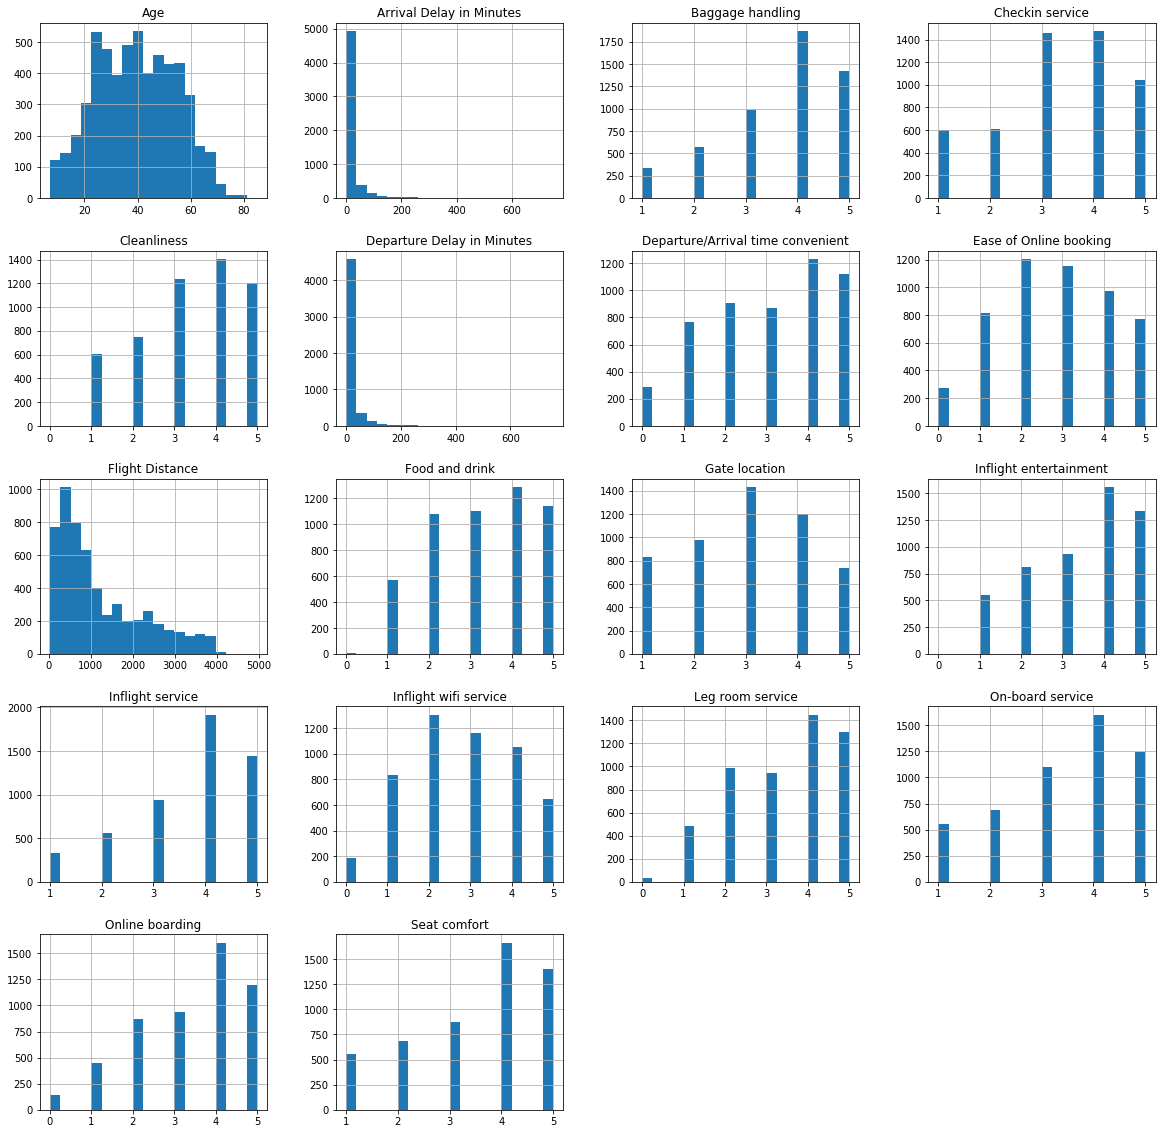

In [12]:
#Further exploration using histogram to check the distributions - EDA
df.hist(bins = 20, figsize= (20,20))

In [13]:
#Target Variable distribution
df['satisfaction'].value_counts()

neutral or dissatisfied    2827
satisfied                  2814
Name: satisfaction, dtype: int64

In [14]:
#value_counts in Gender column
df['Gender'].value_counts()

Female    2894
Male      2747
Name: Gender, dtype: int64

In [15]:
#value_counts in Customer Type column
df['Customer Type'].value_counts()

Loyal Customer       4643
disloyal Customer     998
Name: Customer Type, dtype: int64

In [16]:
#value counts in Class column
df['Class'].value_counts()

Business    2894
Eco         2376
Eco Plus     371
Name: Class, dtype: int64

In [17]:
#Type of travel value counts
df['Type of Travel'].value_counts()

Business travel    4024
Personal Travel    1617
Name: Type of Travel, dtype: int64

There are more than 2 categorical variables that satisfies the required criteria

Imputation and filling out the "Nan" values

In [18]:
#imputing the null values of approx. normally distributed columns with mean

df['Ease of Online booking'] = df['Ease of Online booking'].fillna((df['Ease of Online booking'].mean()))
df['Inflight service'] = df['Inflight service'].fillna((df['Inflight service'].mean()))
df['Checkin service'] = df['Checkin service'].fillna((df['Checkin service'].mean()))
df['Gate location'] = df['Gate location'].fillna((df['Gate location'].mean()))

In [19]:
#imputing the null values of skewed columns with median

df['Flight Distance'] = df['Flight Distance'].fillna((df['Flight Distance'].median()))
df['Seat comfort'] = df['Seat comfort'].fillna((df['Seat comfort'].median()))
df['Inflight wifi service'] = df['Inflight wifi service'].fillna((df['Inflight wifi service'].median()))
df['Inflight entertainment'] = df['Inflight entertainment'].fillna((df['Inflight entertainment'].median()))
df['Food and drink'] = df['Food and drink'].fillna((df['Food and drink'].median()))
df['On-board service'] = df['On-board service'].fillna((df['On-board service'].median()))
df['Leg room service'] = df['Leg room service'].fillna((df['Leg room service'].median()))
df['Baggage handling'] = df['Baggage handling'].fillna((df['Baggage handling'].median()))
df['Cleanliness'] = df['Cleanliness'].fillna((df['Cleanliness'].median()))
df['Online boarding'] = df['Online boarding'].fillna((df['Online boarding'].median()))
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].fillna((df['Departure Delay in Minutes'].median()))
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna((df['Arrival Delay in Minutes'].median()))
df['Departure/Arrival time convenient'] = df['Departure/Arrival time convenient'].fillna((df['Departure/Arrival time convenient'].median()))

In [20]:
#renaming the column names
df = df.rename(columns={"Departure Delay in Minutes": "DepartureDelay", 
                        "Arrival Delay in Minutes": "ArrivalDelay", 
                        "Inflight service": "FlightService",
                        "Inflight entertainment": "FlightEnt",
                        "Inflight wifi service": "FlightWifi",
                        "Ease of Online booking" : "OnlineBookEase" ,
                        "Departure/Arrival time convenient" : "TimeCovenient" ,
                        "Customer Type": "CustType", 
                        "Type of Travel": "TravelType",
                        "Flight Distance": "FlightDist", 
                        "Seat comfort": "SeatComfort",
                        "Food and drink": "FoodDrink",
                        "Gate location": "GateLoc",
                        "On-board service": "OnboardService",
                        "Leg room service": "LegRoom",
                        "Baggage handling": "BaggageHandling",
                        "Online boarding": "OnlineBoarding",
                        "Checkin service": "CheckinService",
                             })

In [21]:
#checking if there are any null values present
df.isnull().sum()

Gender             0
CustType           0
Age                0
TravelType         0
Class              0
FlightDist         0
FlightWifi         0
TimeCovenient      0
OnlineBookEase     0
GateLoc            0
FoodDrink          0
OnlineBoarding     0
SeatComfort        0
FlightEnt          0
OnboardService     0
LegRoom            0
BaggageHandling    0
CheckinService     0
FlightService      0
Cleanliness        0
DepartureDelay     0
ArrivalDelay       0
satisfaction       0
dtype: int64

In [22]:
#checking unique names in categorical columns
print('satisfaction',df.satisfaction.unique())
print('Gender',df.Gender.unique())
print('CustType',df.CustType.unique())
print('TravelType',df.TravelType.unique())
print('Class',df.Class.unique())

satisfaction ['satisfied' 'neutral or dissatisfied']
Gender ['Male' 'Female']
CustType ['Loyal Customer' 'disloyal Customer']
TravelType ['Business travel' 'Personal Travel']
Class ['Business' 'Eco' 'Eco Plus']


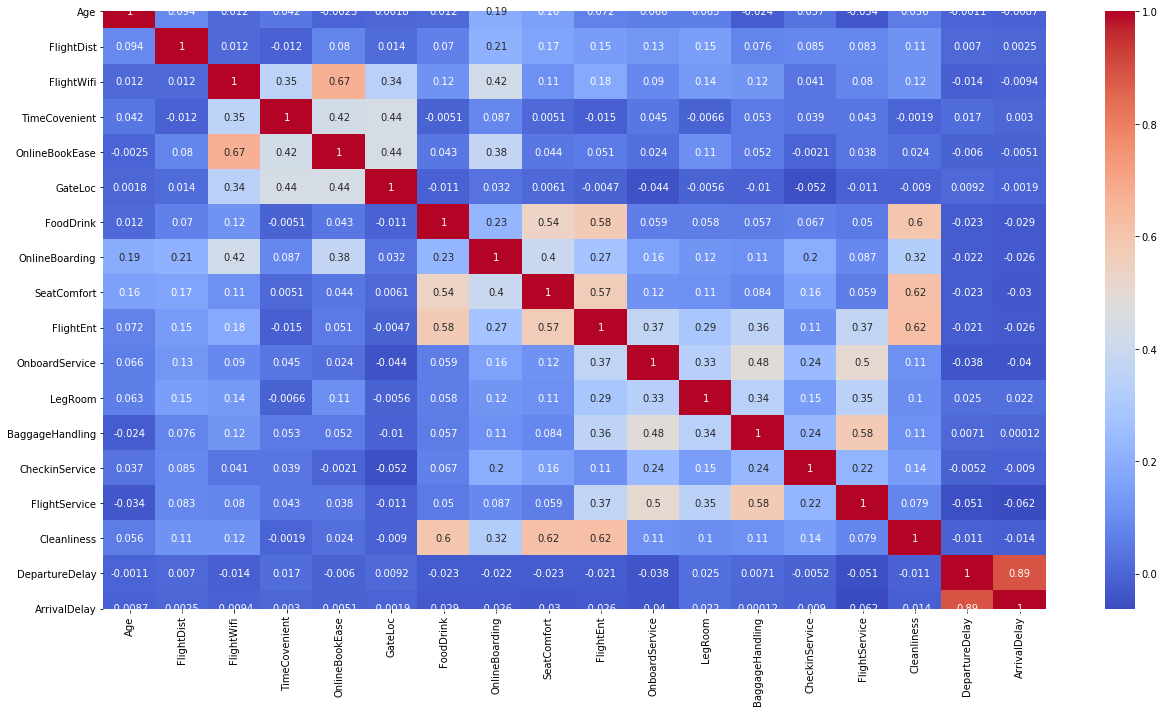

In [23]:
#checking the corelation map after imputation
#seat comfort - food and drink, arrival delay -departure delay have a good co relation among them
fig = plt.figure(figsize=(18,10))
sns.heatmap(df.dropna().corr(),annot=True,cmap="coolwarm")
plt.tight_layout()

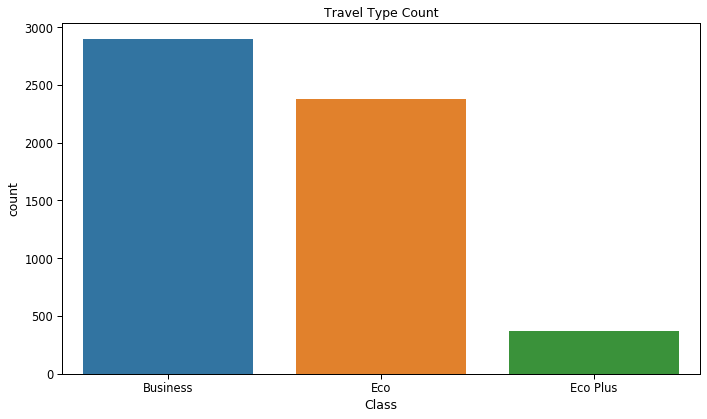

In [24]:
#plotting a seaborn map to see Class distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df,x='Class')
ax.set_title('Travel Type Count')
plt.tight_layout()
plt.show()

In [25]:
#assigning 0's and 1's to the categorical variables
df['satisfaction'] = df['satisfaction'].map( {'satisfied': 1, 'neutral or dissatisfied': 0} ).astype(int)
df['Gender'] = df['Gender'].map( {'Female': 1, 'Male': 0} ).astype(int)
df['CustType'] = df['CustType'].map( {'Loyal Customer': 1, 'disloyal Customer': 0} ).astype(int)
df['TravelType'] = df['TravelType'].map( {'Personal Travel': 1, 'Business travel': 0} ).astype(int)

In [26]:
#one hot encoding of class variable
one_hot_class = pd.get_dummies(df.Class)

In [27]:
#once encoding is done we are dropping the class and appending one_hot_class to data1 df
df.drop(['Class'],axis=1,inplace =True)
df = pd.concat([df, one_hot_class], axis=1)

In [28]:
#checking the head once
df.head()

,Gender,CustType,Age,TravelType,FlightDist,FlightWifi,TimeCovenient,OnlineBookEase,GateLoc,FoodDrink,...,BaggageHandling,CheckinService,FlightService,Cleanliness,DepartureDelay,ArrivalDelay,satisfaction,Business,Eco,Eco Plus
id,,,,,,,,,,,,,,,,,,,,,
57077,0,1,39,0,1222,4.0,4.0,4.0,4.0,2.0,...,5.0,3.000000,5.0,3.0,7.0,1.0,1,1,0,0
58644,1,1,48,0,867,3.0,3.0,3.0,3.0,5.0,...,4.0,3.340077,4.0,4.0,41.0,12.0,1,1,0,0
75316,0,1,46,0,2486,1.0,3.0,1.0,1.0,5.0,...,5.0,3.000000,5.0,5.0,0.0,7.0,1,1,0,0
81534,1,0,23,0,1124,2.0,2.0,2.0,2.0,3.0,...,3.0,5.000000,1.0,3.0,0.0,0.0,1,0,1,0
56098,0,0,29,0,946,5.0,5.0,5.0,4.0,5.0,...,4.0,1.000000,5.0,1.0,0.0,150.0,1,1,0,0


In [29]:
#checking the column names again
df.columns

Index(['Gender', 'CustType', 'Age', 'TravelType', 'FlightDist', 'FlightWifi',
       'TimeCovenient', 'OnlineBookEase', 'GateLoc', 'FoodDrink',
       'OnlineBoarding', 'SeatComfort', 'FlightEnt', 'OnboardService',
       'LegRoom', 'BaggageHandling', 'CheckinService', 'FlightService',
       'Cleanliness', 'DepartureDelay', 'ArrivalDelay', 'satisfaction',
       'Business', 'Eco', 'Eco Plus'],
      dtype='object')

In [30]:
#X and y split
y = df['satisfaction'].values
X = df.drop(['satisfaction'], axis = 1).values

In [31]:
#test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
#checking X values
X_train.shape, X_test.shape

((4512, 24), (1129, 24))

In [33]:
# Scaling the dataset
#through histogram we see that data is not much normally distributed for most of the columns 
#Therefore we use Standard Scaler to normalize and scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN Classification

In [34]:
# Create a new knn model
knn = KNeighborsClassifier()

# n_neighbors to test
k = np.arange(10)+1
param_knn= [{'n_neighbors':k}]

#using gridsearch to test all values for n-neighbors
knn_clf = GridSearchCV(knn, param_knn, cv=8)

#fitting the model
knn_clf.fit(X_train,y_train)

GridSearchCV(cv=8, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

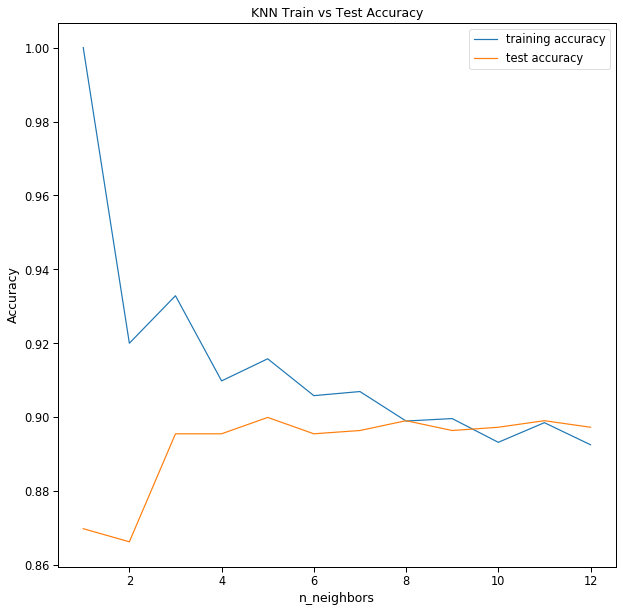

In [35]:
plt.figure(figsize=(10,10))
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 13)
for n_neighbors in neighbors_settings:
    # build the model
    classifier2 = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier2.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(classifier2.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(classifier2.score(X_test, y_test))
#plotting train and test scores for n_neighbors from 1 to 10
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("KNN Train vs Test Accuracy")
plt.legend()
plt.savefig('knn_compare_model')

In [36]:
#Best n_neighbhor value
knn_clf.best_params_

{'n_neighbors': 7}

In [37]:
#Validation score
knn_clf.best_score_

0.880540780141844

In [58]:
#checking accuracy of train and test set
KNN_best = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(KNN_best.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(KNN_best.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.91
Accuracy of KNN classifier on test set: 0.90


In [60]:
#Cross Validation
cvscore = cross_val_score(knn,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.88372093 0.87264673 0.88580931 0.88470067 0.86141907]
Average cross-validation score: 0.8777


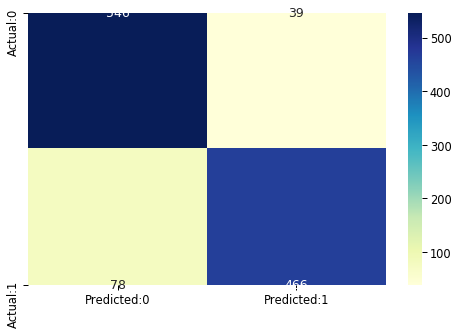

In [61]:
#Confusion Matrix

KNN_predicted = KNN_best.predict(X_test)
cm = confusion_matrix(y_test, KNN_predicted)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [62]:
# Checking the accuracy
accuracy_score(y_test,KNN_predicted)*100

89.63684676705049

# Logistic Regression

In [63]:
#using Logistic Regression
logit = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1', 'l2'] }

In [64]:
# Using Grid search to find the best parameters and fitting the model
logit_clf = GridSearchCV(logit, param_grid,cv=3)
logit_clf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [65]:
#calculating best parameters
logit_clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [66]:
#using the parmeter to find out the train and test accuracy
LR = LogisticRegression(penalty = 'l2', C= 1)
LR.fit(X_train,y_train)

print('Accuracy of logistic regression on training set: {:.4f}'
     .format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression on test set: {:.4f}'
     .format(logit_clf.score(X_test, y_test)))

Accuracy of logistic regression on training set: 0.8639
Accuracy of logistic regression on test set: 0.8627


In [67]:
#Cross Validation
cvscore = cross_val_score(LR,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.87043189 0.83610188 0.87804878 0.85920177 0.845898  ]
Average cross-validation score: 0.8579


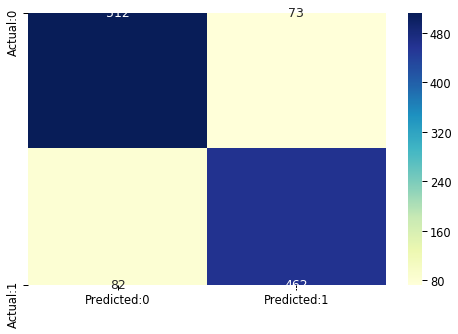

In [68]:
#Confusion Matrix
LR_pred = LR.predict(X_test)
cm = confusion_matrix(y_test, LR_pred)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [69]:
#Accuracy
accuracy_score(y_test,LR_pred)*100

86.27103631532329

# Decision Tree

In [70]:
#using decision tree
dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2,3,5,6,7,8,9,11,13,15]}
# Using Grid search to find the best parameters and fitting the model
grid_search = GridSearchCV(dt_clf, param_grid, cv = 8, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=8, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 5, 6, 7, 8, 9, 11, 13, 15]},
    

In [71]:
#fiding out the best parameter- depth here
grid_search.best_params_

{'max_depth': 7}

In [72]:
#best score
grid_search.best_score_

0.9027039007092199

In [73]:
#training set and test set best accuracy
dt_clf_best = DecisionTreeClassifier(max_depth = 7)
dt_clf_best.fit(X_train,y_train)

print('Train score: {0:0.2f}'.format(dt_clf_best.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(dt_clf_best.score(X_test, y_test)))

Train score: 0.93
Test score: 0.90


In [74]:
#Cross Validation
scores = cross_val_score(dt_clf_best,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross validation scores: [0.90365449 0.91472868 0.89689579 0.88470067 0.90576497]
Average cross-validation score: 0.90


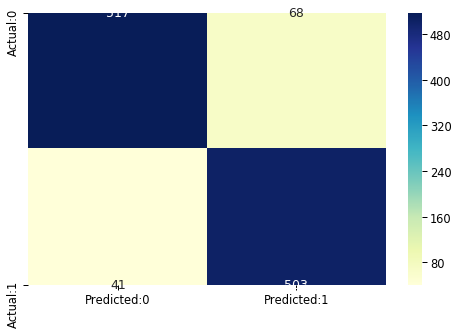

In [75]:
#Confusion Matrix
dt_predicted = dt_clf_best.predict(X_test)
cm = confusion_matrix(y_test, dt_predicted)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [78]:
#Accuracy

accuracy_score(y_test,dt_predicted)*100

90.34543844109831

# Linear SVM

In [79]:
#using SVM
LinSVC = SVC(kernel='linear',max_iter=100000)
LinSVM_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [80]:
# Using Grid search to find the best parameters and fitting the model
LinearSVC_clf = GridSearchCV(LinSVC, LinSVM_params,cv=5)
LinearSVC_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=100000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [81]:
#finding the best parameter
LinearSVC_clf.best_params_

{'C': 10}

In [82]:
#applying the best paramerter and finding the test and train accuracy


clf = LinearSVC (C=10)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
print('Accuracy of linear SVM on training set: {:.4f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of linear SVM on test set: {:.4f}'
     .format(LinearSVC_clf.score(X_test, y_test)))

Accuracy of linear SVM on training set: 0.8661
Accuracy of linear SVM on test set: 0.8671


In [100]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='linear',C=10),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.87043189 0.85271318 0.88470067 0.87028825 0.845898  ]
Average cross-validation score: 0.8648


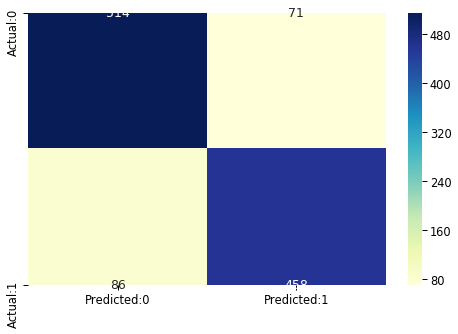

In [101]:
#Making the Confusion Matrix
LSVM_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, LSVM_pred)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [102]:
#Accuracy
accuracy_score(y_test,LSVM_pred)*100

86.09388839681134

# Kernel SVM Linear

In [111]:
#using Kernel SVM
KernelSVCl = SVC(max_iter=10000)
kernelSVCl_params = {'C':[0.001, 0.01, 0.1, 1],'gamma':[1000, 100,10, 1,0.1], 'kernel':['linear']}

In [112]:
# Using Grid search to find the best parameters and fitting the model
KernelSVCl_clf = GridSearchCV(KernelSVCl, kernelSVCl_params,cv=5)
KernelSVCl_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=10000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'gamma': [1000, 100, 10, 1, 0.1],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [113]:
#finding the best paramrter
KernelSVCl_clf.best_params_

{'C': 0.1, 'gamma': 1000, 'kernel': 'linear'}

In [114]:
#finding the best paramrter
KernelSVCl_clf.best_score_

0.8656930704009547

In [115]:
#finding thet train and test accuracy
KernelSVCl_clf= SVC(kernel='linear', C= 0.1, gamma= 1000)
KernelSVCl_clf.fit(X_train,y_train)
KernelSVCl_clf.score(X_train,y_train)
print('Accuracy of Kernelized SVM on training set: {:.2f}'
     .format(KernelSVCl_clf.score(X_train, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVCl_clf.score(X_test, y_test)))

Accuracy of Kernelized SVM on training set: 0.87
Accuracy of Kernelized SVM on test set: 0.8627


In [137]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='linear',C=0.1,gamma=1000),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.87264673 0.85160576 0.88691796 0.8691796  0.8481153 ]
Average cross-validation score: 0.8657


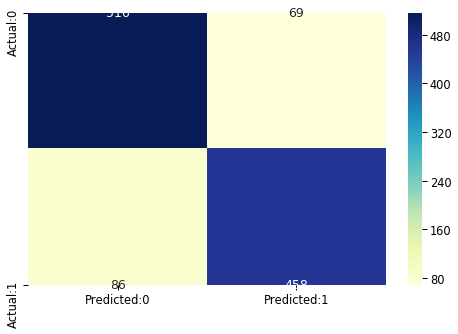

In [138]:
#Making the Confusion Matrix
KSVM_pred = KernelSVCl_clf.predict(X_test)
cm = confusion_matrix(y_test, KSVM_pred)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [139]:
#Accuracy
accuracy_score(y_test,KSVM_pred)*100

86.27103631532329

# Kernel SVM rbf

In [109]:
KernelSVCr = SVC(max_iter=10000)
kernelSVCr_params = {'C':[ 1, 10, 100, 1000, 10000],'gamma':[10,1,0.1,0.01,0.001], 'kernel':['rbf']}

In [110]:
# Using Grid search to find the best parameters and fitting the model
KernelSVCr_clf = GridSearchCV(KernelSVCr, kernelSVCr_params,cv=5)
KernelSVCr_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=10000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [119]:
KernelSVCr_clf.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [120]:
kernelSVCr_clf= SVC(kernel='rbf', C= 1000, gamma= 0.001)
kernelSVCr_clf.fit(X_train,y_train)
kernelSVCr_clf.score(X_train,y_train)
print('Accuracy of Kernelized SVM on training set: {:.4f}'
     .format(kernelSVCr_clf.score(X_train, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(kernelSVCr_clf.score(X_test, y_test)))

Accuracy of Kernelized SVM on training set: 0.9277
Accuracy of Kernelized SVM on test set: 0.9291


In [140]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='rbf',C=1000,gamma=0.001),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.91915836 0.90808416 0.90909091 0.9135255  0.90465632]
Average cross-validation score: 0.9109


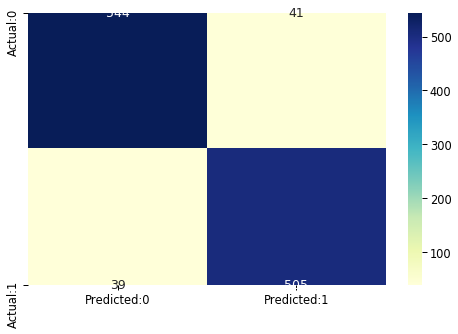

In [141]:
Kernel_SVC_rbf_predicted = kernelSVCr_clf.predict(X_test)
cm=confusion_matrix(y_test,Kernel_SVC_rbf_predicted)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# Kernel SVM (Poly)

In [123]:
#using kernel SVM poly
KernelSVC = SVC(max_iter=10000)
kernelSVC_params = {'C':[0.01, 0.1, 1, 10, 100, 1000, 10000],'gamma':[0.001,0.01,0.1,1,10,100, 1000], 'kernel':['poly']}

In [124]:
# Using Grid search to find the best parameters and fitting the model
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=10000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [125]:
#fiding the best parameter
KernelSVC_clf.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [126]:
#accuracy on both training and test set
kernel_clf= SVC(kernel='poly', C= 0.1, gamma= 0.1)
kernel_clf.fit(X_train,y_train)
kernel_clf.score(X_train,y_train)
print('Accuracy of Kernelized SVM on training set: {:.4f}'
     .format(kernel_clf.score(X_train, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test, y_test)))

Accuracy of Kernelized SVM on training set: 0.9375
Accuracy of Kernelized SVM on test set: 0.8964


In [142]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='linear',C=0.1,gamma=0.1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.87264673 0.85160576 0.88691796 0.8691796  0.8481153 ]
Average cross-validation score: 0.8657


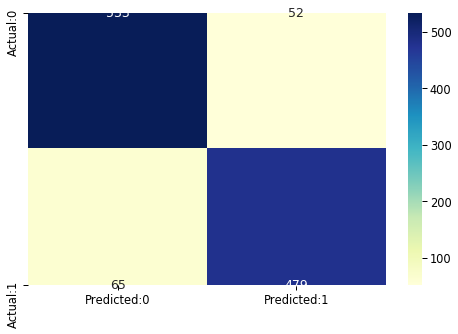

In [143]:
#Making the Confusion Matrix
KPSVM_pred = kernel_clf.predict(X_test)
cm = confusion_matrix(y_test, KPSVM_pred)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [144]:
#Accuracy
accuracy_score(y_test,KPSVM_pred)*100  

89.63684676705049

Appending all the values to a grid shaped box as shown below

In [145]:
models_class=[]

models_class.append({'Model Name' : 'K Nearest Neighbors','Train score': round(KNN_best.score(X_train, y_train),2),
               'Test score': round(KNN_best.score(X_test, y_test),2), 'Accuracy Score' : accuracy_score(y_test,KNN_predicted)})

models_class.append({'Model Name' : 'Logistic Regression','Train score': round(LR.score(X_train, y_train),2),
               'Test score': round(LR.score(X_test, y_test),2), 'Accuracy Score' : accuracy_score(y_test,LR_pred)})

models_class.append({'Model Name' : 'Decision Tree','Train score': round(dt_clf_best.score(X_train, y_train),2),
               'Test score': round(dt_clf_best.score(X_test, y_test),2), 'Accuracy Score' : accuracy_score(y_test,dt_predicted)})

models_class.append({'Model Name' : 'Linear SVM','Train score': round(clf.score(X_train, y_train),2),
                     'Test score': round(clf.score(X_test, y_test),2), 'Accuracy Score' : accuracy_score(y_test,LSVM_pred)})

models_class.append({'Model Name' : 'Kernel SVM (Linear)','Train score': round(KernelSVCl_clf.score(X_train, y_train),2),
                     'Test score': round(KernelSVCl_clf.score(X_test, y_test),2), 'Accuracy Score' : accuracy_score(y_test,KSVM_pred)})

models_class.append({'Model Name' : 'Kernel SVM (RBF)','Train score': round(KernelSVCr_clf.score(X_train, y_train),2),
                     'Test score': round(KernelSVCr_clf.score(X_test, y_test),2), 'Accuracy Score' : accuracy_score(y_test,Kernel_SVC_rbf_predicted)})

models_class.append({'Model Name' : 'Kernel SVM (Poly)','Train score': round(kernel_clf.score(X_train, y_train),2),
                     'Test score': round(kernel_clf.score(X_test, y_test),2), 'Accuracy Score' : accuracy_score(y_test,KPSVM_pred)})

In [146]:
model_class = pd.DataFrame(models_class)
model_class.set_index('Model Name', inplace = True)
model_class

,Train score,Test score,Accuracy Score
Model Name,,,
K Nearest Neighbors,0.91,0.90,0.896368
Logistic Regression,0.86,0.86,0.862710
Decision Tree,0.93,0.90,0.903454
Linear SVM,0.87,0.86,0.860939
Kernel SVM (Linear),0.87,0.86,0.862710
Kernel SVM (RBF),0.93,0.92,0.929141
Kernel SVM (Poly),0.94,0.90,0.896368


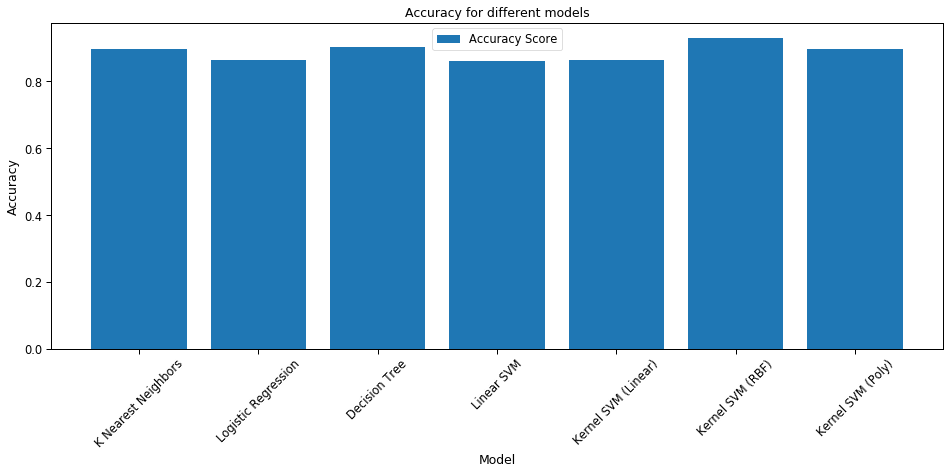

In [147]:
plt.figure(figsize=(16,6))

plt.bar(model_class.index, model_class['Accuracy Score'], label="Accuracy Score")

plt.xticks(model_class.index, rotation = 45)

plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.title("Accuracy for different models")
plt.legend()

# From the accuracies populated above we can say that Kernel SVM RBF is the best Classifier with accuracy score of 92.91%

In [148]:
#predicting the values for the best model
y_pred = KernelSVCr_clf.predict(X_test)